In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib --quiet

In [3]:
!pip install hmmlearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.7 MB/s eta 0:00:00


In [4]:
# Import libraries for data manipulation and analysis
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

# Preprocessing

---



In [6]:
# Read datafile
data = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Silver_Data.csv')
data=data.set_index(pd.DatetimeIndex(data['Date'].values))

# Flip the column
data = data.iloc[::-1]

# Format column Date
data.Date = pd.to_datetime(data.Date,format='%m/%d/%Y')

# Drop column that aren't use
data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis = 1, inplace=True)

df = pd.DataFrame(data, columns=['Date', 'Price'])
df.drop('Date', axis = 1, inplace = True)

In [7]:
# Create a MinMaxScaler object with a specified range
scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(df["Price"]).reshape(-1, 1))

# Spilt Dataset (7-2-1)

---



In [8]:
# Split the data
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [9]:

lowest_mse = 99999
best_params = {}

for n_components in [2, 3, 4, 5, 6, 7, 8, 9]:
    for covariance_type in ["diag", "full", "tied"]:
      for i in range(1, 100):
        model = GaussianHMM(n_components=n_components, covariance_type=covariance_type, random_state = i)
        model.fit(train_data)
        y_pred, _ = model.sample(len(test_data))
        mse = mean_squared_error(scaler.inverse_transform(test_data), scaler.inverse_transform(y_pred.reshape(-1,1)))

        # Update the best parameters if the score improves
        if mse < lowest_mse:
            lowest_mse = mse
            best_params = {
                "n_components": n_components,
                "covariance_type": covariance_type,
                "random_state": i
            }

In [10]:
# Train the HMM model with the best parameters
model = GaussianHMM(**best_params, n_iter=100)
model.fit(train_data)

GaussianHMM(covariance_type='full', n_components=6, n_iter=100, random_state=14)

In [11]:
all_pred, _ = model.sample(test_size+val_size+30)
all_pred = scaler.inverse_transform(all_pred.reshape(-1,1))
test_pred = all_pred[:test_size]
val_pred = all_pred[test_size:test_size+val_size]
thirty_day_pred = all_pred[test_size+val_size:]

In [12]:
# Predict 30 days
new_index = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]
df1 = df.reindex(df.index.union(new_index))

df1.fillna(0, inplace=True)

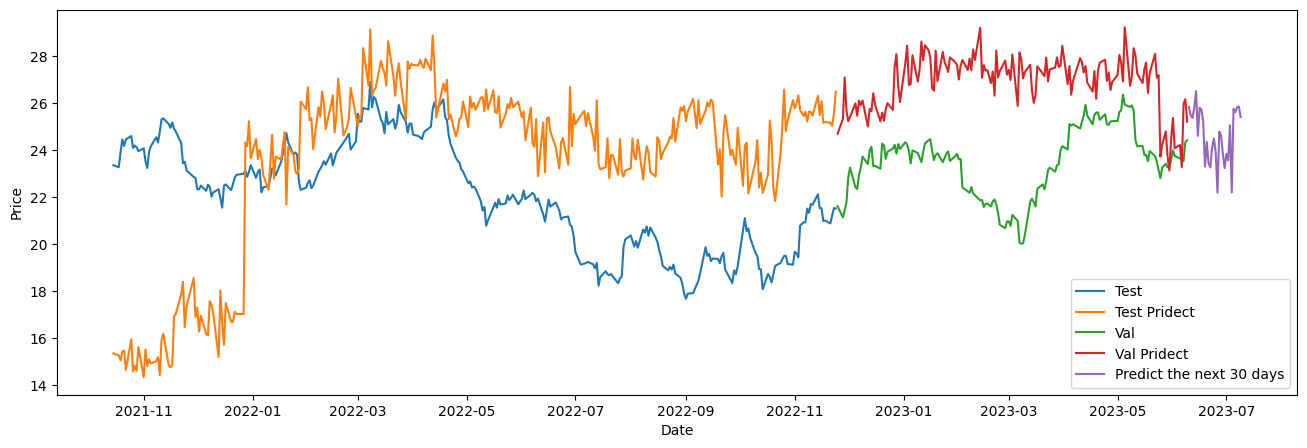

In [13]:
train = df[:train_size]
test = df[train_size:train_size+test_size]
validate = df[train_size+test_size:]

# Plot the model
plt.figure(figsize=(16,5))

plt.plot(test.index, test.Price, label='Test')
plt.plot(test.index, test_pred, label='Test Pridect')
plt.plot(validate.index, validate.Price, label='Val')
plt.plot(validate.index, val_pred, label='Val Pridect')
plt.plot(df1.index[-30:], thirty_day_pred, label='Predict the next 30 days')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
y_test = scaler.inverse_transform(test_data)
y_val = scaler.inverse_transform(val_data)
evaluateModel(y_test,test_pred,y_val,val_pred)

** Testing **
MAE:  4.176867229413623
MAPE:  19.542643200323955
RMSE:  4.843071258630046

** Validate **
MAE:  3.461182825477894
MAPE:  15.198710054714045
RMSE:  3.895033984306537


# Spilt Dataset (6-3-1)

---



In [29]:
# Split the data
train_size = int(0.6 * len(data))
test_size = int(0.3 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [30]:

lowest_mse = 99999
best_params = {}

for n_components in [2, 3, 4, 5, 6, 7, 8, 9]:
    for covariance_type in ["diag", "full", "tied"]:
      for i in range(1, 100):
        model = GaussianHMM(n_components=n_components, covariance_type=covariance_type, random_state = i)
        model.fit(train_data)
        y_pred, _ = model.sample(len(test_data))
        mse = mean_squared_error(scaler.inverse_transform(test_data), scaler.inverse_transform(y_pred.reshape(-1,1)))

        # Update the best parameters if the score improves
        if mse < lowest_mse:
            lowest_mse = mse
            best_params = {
                "n_components": n_components,
                "covariance_type": covariance_type,
                "random_state": i
            }

In [31]:
# Train the HMM model with the best parameters
model = GaussianHMM(**best_params, n_iter=100)
model.fit(train_data)

GaussianHMM(covariance_type='tied', n_components=6, n_iter=100, random_state=97)

In [32]:
all_pred, _ = model.sample(test_size+val_size+30)
all_pred = scaler.inverse_transform(all_pred.reshape(-1,1))
test_pred = all_pred[:test_size]
val_pred = all_pred[test_size:test_size+val_size]
thirty_day_pred = all_pred[test_size+val_size:]

In [33]:
# Predict 30 days
new_index = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]
df1 = df.reindex(df.index.union(new_index))

df1.fillna(0, inplace=True)

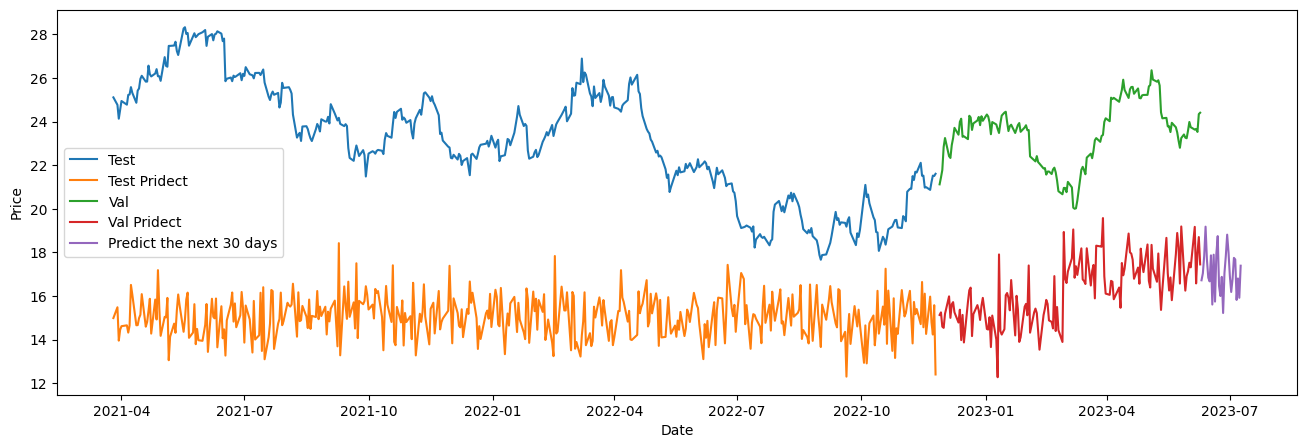

In [34]:
train = df[:train_size]
test = df[train_size:train_size+test_size]
validate = df[train_size+test_size:]

# Plot the model
plt.figure(figsize=(16,5))

plt.plot(test.index, test.Price, label='Test')
plt.plot(test.index, test_pred, label='Test Pridect')
plt.plot(validate.index, validate.Price, label='Val')
plt.plot(validate.index, val_pred, label='Val Pridect')
plt.plot(df1.index[-30:], thirty_day_pred, label='Predict the next 30 days')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
y_test = scaler.inverse_transform(test_data)
y_val = scaler.inverse_transform(val_data)
evaluateModel(y_test,test_pred,y_val,val_pred)

** Testing **
MAE:  8.030296098824905
MAPE:  33.87498233529341
RMSE:  8.512949622065415

** Validate **
MAE:  7.187186149928716
MAPE:  30.452854018198792
RMSE:  7.4231479159261236


# Spilt Dataset (5-3-2)

---



In [15]:
# Split the data
train_size = int(0.5 * len(data))
test_size = int(0.3 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [16]:

lowest_mse = 99999
best_params = {}

for n_components in [2, 3, 4, 5, 6, 7, 8, 9]:
    for covariance_type in ["diag", "full", "tied"]:
      for i in range(1, 100):
        model = GaussianHMM(n_components=n_components, covariance_type=covariance_type, random_state = i)
        model.fit(train_data)
        y_pred, _ = model.sample(len(test_data))
        mse = mean_squared_error(scaler.inverse_transform(test_data), scaler.inverse_transform(y_pred.reshape(-1,1)))

        # Update the best parameters if the score improves
        if mse < lowest_mse:
            lowest_mse = mse
            best_params = {
                "n_components": n_components,
                "covariance_type": covariance_type,
                "random_state": i
            }

In [17]:
# Train the HMM model with the best parameters
model = GaussianHMM(**best_params, n_iter=100)
model.fit(train_data)

GaussianHMM(covariance_type='tied', n_components=4, n_iter=100, random_state=31)

In [18]:
all_pred, _ = model.sample(test_size+val_size+30)
all_pred = scaler.inverse_transform(all_pred.reshape(-1,1))
test_pred = all_pred[:test_size]
val_pred = all_pred[test_size:test_size+val_size]
thirty_day_pred = all_pred[test_size+val_size:]

In [19]:
# Predict 30 days
new_index = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]
df1 = df.reindex(df.index.union(new_index))

df1.fillna(0, inplace=True)

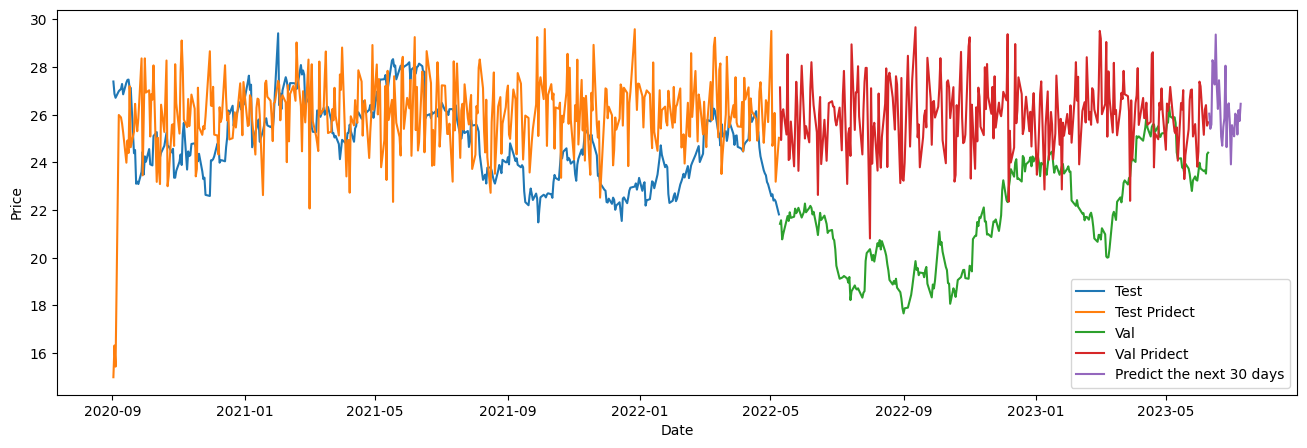

In [20]:
train = df[:train_size]
test = df[train_size:train_size+test_size]
validate = df[train_size+test_size:]

# Plot the model
plt.figure(figsize=(16,5))

plt.plot(test.index, test.Price, label='Test')
plt.plot(test.index, test_pred, label='Test Pridect')
plt.plot(validate.index, validate.Price, label='Val')
plt.plot(validate.index, val_pred, label='Val Pridect')
plt.plot(df1.index[-30:], thirty_day_pred, label='Predict the next 30 days')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [21]:
y_test = scaler.inverse_transform(test_data)
y_val = scaler.inverse_transform(val_data)
evaluateModel(y_test,test_pred,y_val,val_pred)

** Testing **
MAE:  2.057873151848575
MAPE:  8.464600028040717
RMSE:  2.618976476632224

** Validate **
MAE:  4.2923152533935305
MAPE:  20.89128447898157
RMSE:  4.990719335024055


# Evaluate model

---
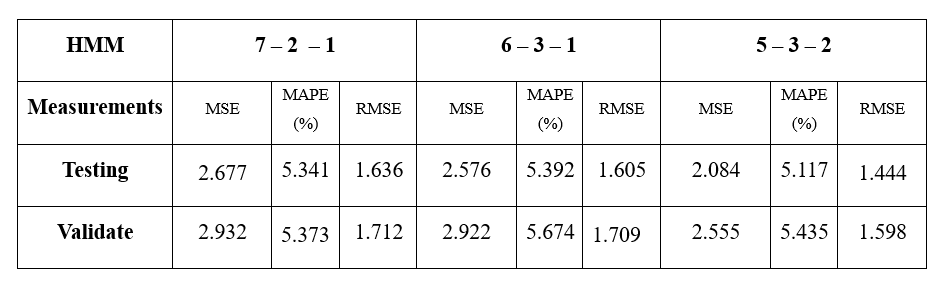
